# Relax Inc. <a id='2_Data_wrangling'></a>

Relax Inc. makes productivity and project management software that's popular with both individuals and teams. 

The data is available as two attached CSV files:
- takehome_user_engagement.csv
- takehome_users.csv

Please send us a brief writeup of your findings (the more concise, the better, no more than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_engage = pd.read_csv('C:/Users/bayar/Downloads/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv')
data_engage = data_engage.set_index(pd.DatetimeIndex(data_engage['time_stamp']))
data_users = pd.read_csv('C:/Users/bayar/Downloads/1481069814_relax_challenge/relax_challenge/takehome_users.csv',encoding='latin-1')

In [2]:
data_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
data_engage.head()

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1


In [4]:
print(data_engage.time_stamp.min())
print(data_engage.time_stamp.max())

2012-05-31 08:20:06
2014-06-06 14:58:50


In [5]:
#check the number of users and logins
print('There are {} users and {} total logins.'.format(data_engage['user_id'].nunique(), len(data_engage)))

There are 8823 users and 207917 total logins.


In [6]:
data_engage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ MB


## 1. Data Wrangling<a id='2.3_Imports'></a>

### Adopted Users<a id='2.3_Imports'></a>

In [7]:
# convert time_stamp into datetime format
data_engage['time_stamp'] = pd.to_datetime(data_engage['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [8]:
import datetime as dt
from datetime import timedelta

In [9]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period
def logins_in_days(df, days=7, logins=3):
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [10]:
# group by users
adopted = data_engage.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [11]:
adopted.reindex()
adopted.head()

user_id
1    False
2     True
3    False
4    False
5    False
Name: adopted_user, dtype: bool

In [12]:
print('There are {} adopted users out of {} users.'.format(sum(adopted), len(adopted)))

There are 1656 adopted users out of 8823 users.


In [13]:
# Drop the column as it is not relevant for analysis
data_users.drop('name', axis=1, inplace=True)
data_users.head()

,object_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
# Convert time stamps to datetime objects
data_users.creation_time = pd.to_datetime(data_users.creation_time)
#last_session_creation_time is a unix time stamp, so use map to convert to datetime
data_users['last_session_creation_time'] = data_users['last_session_creation_time'].map(lambda data: 
                                    dt.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'), na_action='ignore')

In [15]:
data_users['last_session_creation_time'] = pd.to_datetime(data_users['last_session_creation_time'])
                                                                              
# Create two new features by subtraction
data_users['active_days'] = data_users['last_session_creation_time'] - data_users['creation_time']
data_users['active_days'] = data_users['active_days'].dt.days

data_users['account_age'] = max(data_users['creation_time']) - data_users['creation_time']
data_users['account_age'] = data_users['account_age'].dt.days

In [16]:
# Clean up email domain
data_users['email_provider'] = [x.split('@')[1] for x in data_users.email]
top_emails = data_users.email_provider.value_counts().index[:6]
#label anything not in the top 5
data_users['email_provider'] = [x if x in top_emails else 'other' for x in data_users.email_provider]

In [17]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   active_days                 8823 non-null   float64       
 10  account_age                 12000 non-null  int64         
 11  email_provider              12000 non-null  object    

In [18]:
# drop coloumns: email, creation_time and last_session_creation_time
data_users.drop(['email', 'creation_time', 'last_session_creation_time'], axis=1, inplace=True)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   invited_by_user_id          6417 non-null   float64
 6   active_days                 8823 non-null   float64
 7   account_age                 12000 non-null  int64  
 8   email_provider              12000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 843.9+ KB


In [19]:
# check users with the most invites
data_users.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [20]:
data_users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [21]:
#Let's drop these two columns
data_users.drop(['invited_by_user_id', 'org_id'], axis=1, inplace=True)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   active_days                 8823 non-null   float64
 5   account_age                 12000 non-null  int64  
 6   email_provider              12000 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 656.4+ KB


In [22]:
#Remove users with missing data
data_users.dropna(inplace=True)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_source             8823 non-null   object 
 2   opted_in_to_mailing_list    8823 non-null   int64  
 3   enabled_for_marketing_drip  8823 non-null   int64  
 4   active_days                 8823 non-null   float64
 5   account_age                 8823 non-null   int64  
 6   email_provider              8823 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 551.4+ KB


In [23]:
# merge user data and "adopted user" variable
data_users = data_users.set_index('object_id')
data_users.index.name = 'user_id'
df = pd.concat([data_users, adopted], axis=1, join='inner')
df['adopted_user'] = df['adopted_user'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             8823 non-null   object 
 1   opted_in_to_mailing_list    8823 non-null   int64  
 2   enabled_for_marketing_drip  8823 non-null   int64  
 3   active_days                 8823 non-null   float64
 4   account_age                 8823 non-null   int64  
 5   email_provider              8823 non-null   object 
 6   adopted_user                8823 non-null   int32  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 775.0+ KB


## 2. Exploratory Data Analysis<a id='2.3_Imports'></a>

In [24]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_days,account_age,email_provider,adopted_user
user_id,,,,,,,
1,GUEST_INVITE,1,0,-1.0,38,yahoo.com,0
2,ORG_INVITE,0,0,135.0,196,gustr.com,1
3,ORG_INVITE,0,0,-1.0,437,gustr.com,0
4,GUEST_INVITE,0,0,0.0,374,yahoo.com,0
5,GUEST_INVITE,0,0,4.0,498,yahoo.com,0


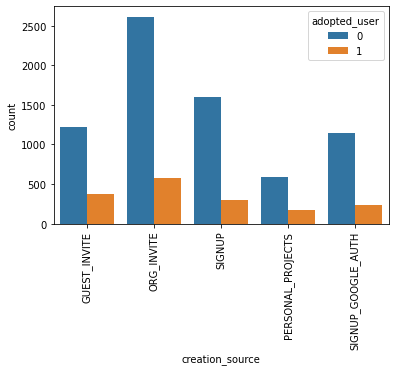

In [25]:
import seaborn as sns

# Creation_source vs adopted_user
_ = sns.countplot(x='creation_source', data=df, hue='adopted_user')
_ = plt.xticks(rotation=90)

In [26]:
# Creation_source vs adopted_user on chi2 test 
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['creation_source'], df['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 41.27933208242451	p = 2.3526508745340972e-08


In [27]:
# chi2 test shows us significance of creation_source
df.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.232368
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted_user, dtype: float64

In [28]:
# check mailing list and marketing drip
df.groupby('opted_in_to_mailing_list')['adopted_user'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.185994
1    0.192722
Name: adopted_user, dtype: float64

In [29]:
def z_test(df, col, target='adopted_user'):
    from statsmodels.stats.weightstats import CompareMeans
    opted_in = df.loc[df[col]==1, target]
    opted_out = df.loc[df[col]==0, target]
    z_data = CompareMeans.from_data(opted_in, opted_out)
    z, p = CompareMeans.ztest_ind(z_data)
    print('For {}, z = {}, p = {}'.format(col, z, p))
z_test(df, 'opted_in_to_mailing_list')

For opted_in_to_mailing_list, z = 0.7029779128148219, p = 0.4820695142048773


In [30]:
df.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.186982
1    0.191648
Name: adopted_user, dtype: float64

In [31]:
z_test(df, 'enabled_for_marketing_drip')

For enabled_for_marketing_drip, z = 0.40292649500940353, p = 0.6870022995069649


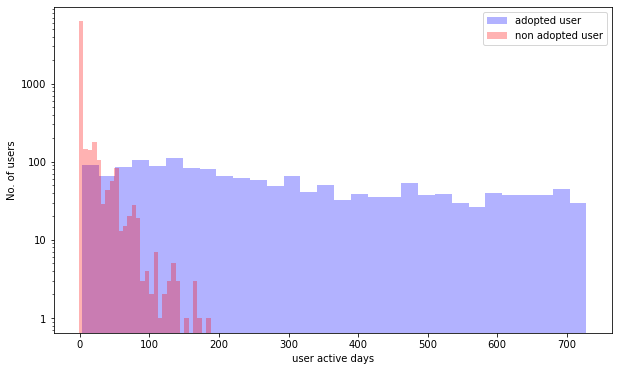

In [32]:
# historical data of adopted user
def plot_hist_days(df, col, xlabel):
    _ = plt.hist(df.loc[df['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='b', label='adopted user')
    _ = plt.hist(df.loc[df['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='r', label='non adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

plot_hist_days(df, 'active_days', 'user active days')

The provided plot reveals a pattern where users who have a greater number of active days are more inclined to be adopted users.

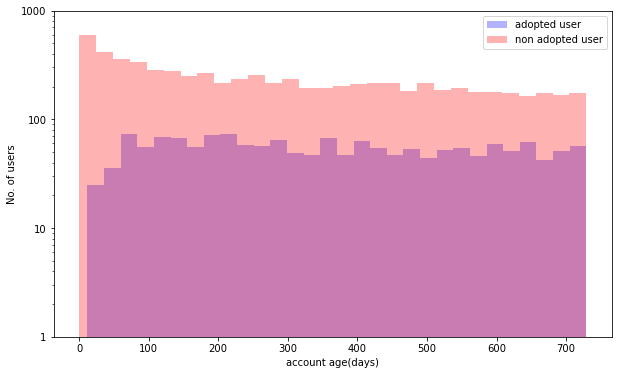

In [33]:
plt.figure(figsize=(10, 6))
plot_hist_days(df, 'account_age', 'account age(days)')

The rate of adoption is diminished in newer accounts. Apart from this, there has been minimal fluctuation in the adoption rate over the past two years.

In [34]:
data_users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_days,account_age,email_provider
user_id,,,,,,
1,GUEST_INVITE,1,0,-1.0,38,yahoo.com
2,ORG_INVITE,0,0,135.0,196,gustr.com
3,ORG_INVITE,0,0,-1.0,437,gustr.com
4,GUEST_INVITE,0,0,0.0,374,yahoo.com
5,GUEST_INVITE,0,0,4.0,498,yahoo.com


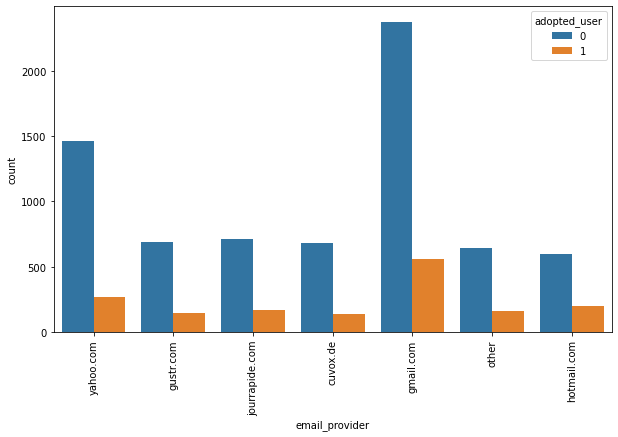

In [35]:
# Let's review email_provider
plt.figure(figsize=(10, 6))
_ = sns.countplot(x='email_provider', data=df, hue='adopted_user')
_ = plt.xticks(rotation=90)

In [36]:
# Run chi2 test on email-providers
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['email_provider'], df['adopted_user'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 39.11760804796107	p = 6.787523400561603e-07


In [37]:
# chi2 test also shows that email_provider is significant
df.groupby('email_provider')['adopted_user'].apply(lambda x: sum(x)/len(x))

email_provider
cuvox.de          0.173913
gmail.com         0.190102
gustr.com         0.178147
hotmail.com       0.255293
jourrapide.com    0.192525
other             0.200986
yahoo.com         0.154693
Name: adopted_user, dtype: float64

Users with email addresses ending in hotmail.com exhibit a slightly elevated rate of being categorized as "adopted users," while users with email addresses ending in yahoo.com demonstrate a comparatively lower rate.

## 3. Modeling<a id='2.3_Imports'></a>

In [38]:
# get dummy variable for creation_source and email_provider
creation_source = pd.get_dummies(df['creation_source'], drop_first=True)
email_provider = pd.get_dummies(df['email_provider'], drop_first=True)
model_data = pd.concat([df, creation_source], axis=1).drop(['creation_source', 'email_provider'], axis=1)

In [39]:
y = model_data['adopted_user']
X = model_data.drop('adopted_user', axis=1)

In [40]:
# create training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [41]:
# For this model we use Random Forest model with balanced class weights to correct imbalance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [42]:
# CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(X_train, y_train)
print('Best parameters:', model.best_params_)
print('Best average precision:', model.best_score_)

Best parameters: {'n_estimators': 100}
Best average precision: 0.9623700369708137


In [43]:
# model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy of test set:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of test set: 0.9505893019038985
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.88      0.86      0.87       414

    accuracy                           0.95      2206
   macro avg       0.92      0.91      0.92      2206
weighted avg       0.95      0.95      0.95      2206

[[1742   50]
 [  59  355]]


In [44]:
# Let's review feature importance
imp = pd.Series(model.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

active_days                   0.894381
account_age                   0.089794
opted_in_to_mailing_list      0.003269
SIGNUP                        0.003126
enabled_for_marketing_drip    0.002863
ORG_INVITE                    0.002509
PERSONAL_PROJECTS             0.002153
SIGNUP_GOOGLE_AUTH            0.001906
dtype: float64


Evidently, "active_days" stands out as the most influential feature, closely followed by "account_age" as the second most significant. These two attributes exhibit relevance by showcasing a positive correlation between extended "active_days" and increased "account_age." In light of this, I propose that Relax consider bolstering the adoption rate by motivating existing users to engage with the software after they have maintained their accounts for a considerable period.

The subsequent crucial aspect is "opted_in_to_mailing_list." I recommend that Relax concentrate on elevating the proportion of users who willingly opt to receive marketing emails. This strategy could potentially yield an upsurge in user engagement.

Among the various creation sources, "SIGNUP" (registration via website) emerges as the pivotal element, with "ORG_INVITE" closely following as the second most influential factor affecting adoption rates. Thus, it's imperative for Relax to enhance the website's user experience and initiate promotional efforts to encourage more users to opt for website sign-ups. Furthermore, fostering incentives for organizations to extend invitations to prospective users could also prove beneficial.

The fourth significant factor pertains to "enabled_for_marketing_drip." Consequently, it is advisable for Relax to focus on attracting users to enable regular marketing email drips, as this could contribute positively to user engagement and adoption.